In [1]:
import streamlit as st
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

from PIL import Image

2022-06-01 19:18:14.216 INFO    numexpr.utils: Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2022-06-01 19:18:14.218 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


In [2]:
#st.title('Welcome to the Pokemon ID Project')

type_model = tf.keras.models.load_model('Models/type_select_model')

'''user_pic = st.file_uploader(label='Please upload your picture to identify what pokemon it is.',
                    type=['png', 'jpg']'''

"user_pic = st.file_uploader(label='Please upload your picture to identify what pokemon it is.',\n                    type=['png', 'jpg']"

In [3]:
def load_image(image_file):
    img = Image.open(image_file)
    img = img.resize((128, 128))
    img = img.convert("RGB")
    return img

In [4]:
class_names =['Bug',
 'Dark',
 'Dragon',
 'Electric',
 'Fairy',
 'Fighting',
 'Fire',
 'Ghost',
 'Grass',
 'Ground',
 'Ice',
 'Normal',
 'Poison',
 'Psychic',
 'Rock',
 'Steel',
 'Water']

In [5]:
test_img = load_image('snorlax.png')

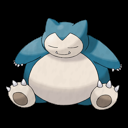

In [6]:
test_img

In [19]:
# https://towardsdatascience.com/how-to-predict-an-image-with-keras-ca97d9cd4817
alt_test_img = image.load_img('Snorlax.png', target_size=(128, 128))
alt_test_array = image.img_to_array(alt_test_img)
alt_test_batch = np.expand_dims(alt_test_array, axis=0)

In [20]:
alt_test_pred = type_model.predict(alt_test_batch)

1/1 [==============================] - 0s 137ms/step


In [21]:
alt_test_pred

array([[-16.05719  , -27.299826 , -12.793409 ,  -4.6300344, -21.999765 ,
        -18.348501 , -15.007192 , -19.116364 , -13.59043  , -22.352024 ,
         -5.964155 ,  -0.6158684, -21.246473 , -10.803811 , -19.923069 ,
        -23.755533 ,  -2.6595452]], dtype=float32)

In [23]:
class_names[np.argmax(alt_test_pred)]

'Normal'

In [9]:
test_array3 = np.array(test_img)

In [10]:
test_array3.shape

(128, 128, 3)

In [11]:
test_batch3 = np.expand_dims(test_array3, axis=0)

In [12]:
test_batch3.shape

(1, 128, 128, 3)

In [37]:
test_pred = type_model.predict(test_batch3)

1/1 [==============================] - 0s 21ms/step


In [38]:
test_pred

array([[-25.050861  , -28.009876  , -19.074108  ,   3.9626276 ,
        -25.150757  , -22.00959   , -15.56798   , -11.588649  ,
        -10.084192  , -10.0340805 , -17.50195   , -11.36906   ,
        -16.870659  , -12.166667  , -14.671036  ,  -2.3662355 ,
         -0.48166415]], dtype=float32)

In [35]:
class_names[np.argmax(test_pred)]

'Electric'

In [63]:
np.argmax(test_pred)

11

In [25]:
model_dict = {}
for name in class_names:
    model_dict[name] = tf.keras.models.load_model(f'models/{name}_model')

In [65]:
model_dict

{'Bug': <keras.engine.sequential.Sequential at 0x152f88d2160>,
 'Dark': <keras.engine.sequential.Sequential at 0x1520ea0b550>,
 'Dragon': <keras.engine.sequential.Sequential at 0x152cd9ef340>,
 'Electric': <keras.engine.sequential.Sequential at 0x15300a46820>,
 'Fairy': <keras.engine.sequential.Sequential at 0x1531ceedc10>,
 'Fighting': <keras.engine.sequential.Sequential at 0x1532ec3ef10>,
 'Fire': <keras.engine.sequential.Sequential at 0x153385a38b0>,
 'Ghost': <keras.engine.sequential.Sequential at 0x1535054e7f0>,
 'Grass': <keras.engine.sequential.Sequential at 0x1535a80fbb0>,
 'Ground': <keras.engine.sequential.Sequential at 0x15361a6c850>,
 'Ice': <keras.engine.sequential.Sequential at 0x1536b44fca0>,
 'Normal': <keras.engine.sequential.Sequential at 0x153780d1bb0>,
 'Poison': <keras.engine.sequential.Sequential at 0x1537d1324c0>,
 'Psychic': <keras.engine.sequential.Sequential at 0x15380bf8970>,
 'Rock': <keras.engine.sequential.Sequential at 0x15380db1af0>,
 'Steel': <keras.eng

In [26]:
ind_model = model_dict['Normal']
ind_model

In [32]:
ind_pred = ind_model.predict(test_batch3)

1/1 [==============================] - 0s 60ms/step


In [27]:
alt_ind_pred = ind_model.predict(alt_test_batch)

1/1 [==============================] - 0s 66ms/step


In [105]:
ind_pred

array([[1.10616668e-07, 5.64178187e-14, 3.18987610e-08, 1.59080971e-10,
        4.50863303e-16, 5.03813622e-23, 5.37677778e-21, 9.99982476e-01,
        1.30618564e-21, 3.61159834e-23, 1.39037896e-22, 1.14275584e-24,
        8.59497909e-22, 1.95830940e-17, 2.19961663e-28, 4.76274922e-11,
        2.11608043e-25, 7.12770686e-25, 9.40250118e-08, 5.46677049e-19,
        2.21234524e-16, 6.64651650e-25, 2.70772739e-24, 3.73296767e-18,
        8.70758340e-14, 6.28456823e-17, 1.49534353e-24, 3.79959336e-22,
        6.08058525e-15, 5.11928555e-10, 1.06392451e-21, 1.62013028e-24,
        2.14434175e-33, 6.42102307e-25, 3.25376240e-21, 1.07306036e-18,
        2.81626171e-06, 1.72832060e-17, 3.47748358e-11, 4.93167545e-21,
        1.36701737e-15, 2.94478614e-18, 2.89141579e-15, 1.58729223e-16,
        5.44374609e-22, 1.86920032e-19, 8.17496459e-10, 2.87020848e-21,
        3.11150675e-14, 3.45058902e-32, 0.00000000e+00, 2.95602301e-15,
        1.38256547e-17, 5.94762295e-10, 3.65911487e-20, 2.024549

In [28]:
pokemon_dict= pd.read_csv('data/pokemon_class_dict.csv', header=None, index_col=0).squeeze("columns").to_dict()

In [29]:
test_list = pokemon_dict['Normal'].split(',')

In [33]:
test_list[np.argmax(ind_pred)]

" '143-Snorlax'"

In [34]:
test_list[np.argmax(alt_ind_pred)]

" '143-Snorlax'"